In [1]:
import os

In [2]:
fit_query = ['Test_Subject_1', 'id', 'J, TB', 'Side_View, Top_View']
test_query = ['Test_Subject_1', 'ood', 'TB', 'Side_View']

In [21]:
# appending all paths in the fit query first
fit_files = []
for participant in fit_query[0].split(", "):
    for dist in fit_query[1].split(", "):
        for task in fit_query[2].split(", "):
            for view in fit_query[3].split(", "):
                path = os.path.join('.', 'data', 'Labels', participant, dist, task, view)
                fit_files.append(path)

# appending all paths in the test_query
test_files = []
for participant in test_query[0].split(", "):
    for dist in test_query[1].split(", "):
        for task in test_query[2].split(", "):
            for view in test_query[3].split(", "):
                path = os.path.join('.', 'data', 'Labels', participant, dist, task, view)
                test_files.append(path)

print(fit_files)

['.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View', '.\\data\\Labels\\Test_Subject_1\\id\\J\\Top_View', '.\\data\\Labels\\Test_Subject_1\\id\\TB\\Side_View', '.\\data\\Labels\\Test_Subject_1\\id\\TB\\Top_View']


In [27]:
fit = [os.path.join(path, file) for path in fit_files for file in os.listdir(path)]
test = [os.path.join(path, file) for path in test_files for file in os.listdir(path)]

fit

['.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_0.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_1012.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_1181.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_1349.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_1518.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_168.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_1687.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_1855.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_2024.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_2193.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_2362.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_2530.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_2699.0.png',
 '.\\data\\Labels\\Test_Subject_1\\id\\J\\Side_View\\J_GL_2868.0.png',
 '.\\data\

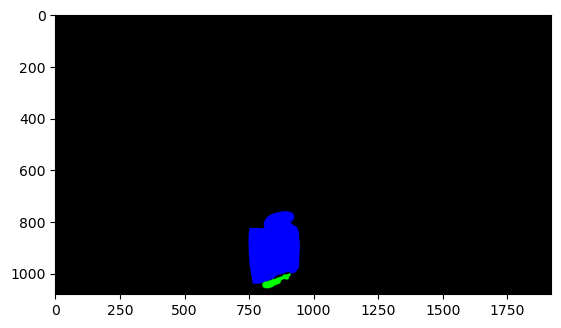

In [29]:
import matplotlib.pyplot as plt

img = plt.imread(fit[0])
plt.imshow(img)

## Testing ACE

In [1]:
## Pseudocode

"""
input:
    y - [N, W, H]
probs = softmax(predictions) -> [N, C, W, H]
conf, predictions = torch.max(probs, axis=1) -> [N, W, H] (probabilities for each argmax class)
 - predictions is the argmax, conf is the corresponding probabilities
 - predictions = argmax over entire set -> [N, W, H]
   
 
aces = []

for each image

    sum = 0

    for each class
        find total range of probabilities of class in image and sort
        split into ranges -> every N/Rth index

        for each range
            compute accuracy
                - select values that match the bin
                    - find the relevant predicted values
                        - probs = torch.where(predictions == class, probs, 0)  # probability array only for valeus of the given class
                        - predicted values = torch.where(((probs >= lower) & (probs<= upper)), predictions, 0) # returns argmax predictions for values in the decided range
                        - relevant indices = probs.where((probs >= lower) & (probs<= upper))
                    - find the relevant ground truth values
                        - relevant_truth = y[relevant indices]
                        - acc = predicted_values - relevant_truth
                        - acc = abs(torch.sum(acc)) / len(predicted_values) 
                        - accurate values = torch.where(((y >= upper) & (y<= lower)), 
            compute confidence (avg of probs in the range)
            sum += abs(acc - conf)
    
    ACE = sum / (num_classes * R)
    aces.append(ACE)

reurn avg(aces)

"""

'\ninput:\n    y - [N, W, H]\npredictions = argmax over entire set -> [N, W, H]\nprobs = softmax(predictions) -> [N, C, W, H]\n\nfor each image\n    for each class\n        find total range of probabilities\n        split into ranges\n\n        for each range\n            compute accuracy\n            compute \n\n\n'

In [2]:
print(4)

4


In [1]:
import torch
torch.randn(1, 2, 3)

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


tensor([[[-1.6551, -1.0751, -0.6622],
         [ 2.7866, -0.3931,  0.4745]]])

In [21]:
from UNET import UNET


x = torch.randn(2, 3, 16, 16)
inputs = [x]


models = [UNET(in_channels=3, out_channels=3, droprate=0) for _ in range(1)]

raw_preds = []
for model, x in zip(models, inputs):
    raw = model(x)
    print(raw.shape)
    raw_preds.append(raw)

raw_stack = torch.stack(raw_preds, dim=0)
avg_preds = torch.mean(raw_stack, dim=0)

print(avg_preds.shape)
print(raw_stack.shape)


torch.equal(avg_preds, model(inputs[0]))








torch.Size([2, 3, 16, 16])
torch.Size([2, 3, 16, 16])
torch.Size([1, 2, 3, 16, 16])


True

In [ ]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
from dataloader import AssemblyDataset
from torch.utils.data import DataLoader
from UNET import UNET
import torch.nn.functional as F
from torch.utils.data import random_split
from argparse import ArgumentParser
import os
from datamodule import AssemblyDataModule
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning.profilers import PyTorchProfiler
import torchvision
import torchmetrics
from metrics import *
import numpy as np
from pytorch_lightning.cli import LightningCLI

class LitModel(pl.LightningModule):
    def __init__(self, num_models=2, droprate=0):
        super(LitModel, self).__init__()
        self.models = [UNET(in_channels=3, out_channels=3, droprate=0) for _ in range(num_models)]
        # model = UNET(in_channels=3, out_channels=3, droprate=0)
        self.iou = torchmetrics.JaccardIndex(task="multiclass", num_classes=3)

        #only use hyperparameters if you need it for instantiating the model
        # otherwise, use it from the CLI only for simplicity
        # self.save_hyperparameters()


    def training_step(self, batch, batch_idx):
        loss, raw_preds= self._common_set(batch, batch_idx)

        # raw preds shape - [4, 3, 161, 161]

        # defualt on epoch=False, which is why it was not showing earlier
        self.log("train_loss", loss, on_epoch=True, prog_bar=True, logger=True)

        # why was no training loss recorded?
        # what is hp metric

        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        loss, raw_preds= self._common_set(batch, batch_idx)
        self.log_dict(
            {
                "val_loss": loss,
                "val_iou": self.iou(raw_preds, y.to(torch.int32))
            },
            prog_bar=True
        )

        # for every two batches
        if batch_idx % 2 == 0:
            self._make_grid(x, "val_images")
            predictions = torch.argmax(raw_preds, dim=1)

            # predictions only on 0, 1 (most likely because we need more epochs) -> check that dim is correct, though
            self._make_grid(predictions, "val_preds")

    def test_step(self, batch, batch_idx):
        x, y = batch
        # is this working properly? barely any metric data.
        loss, raw_preds = self._common_set(batch, batch_idx)

        # raw_preds - [4, 3, 161, 161]
        # y - [4, 161, 161]
        # x- [4, 3, 161, 161]

        # automatically averages these values across the epoch
        self.log_dict(
            {
                "test_loss": loss,
                "test_iou": self.iou(raw_preds, y.to(torch.int32)),
                # "test_ace": adaptive_calibration_error(raw_preds, y),
                "test_entropy": predictive_entropy(raw_preds)
            },
            prog_bar=True
        )

    def predict_step(self, batch, batch_idx):
        # used only when loading a model from a checkpoint
        # use argmax here
        x, y = batch
        raw_preds = self.model(x)
        probs = F.softmax(raw_preds, dim=1)
        preds = torch.argmax(probs, dim=1)
        return preds

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(
            [
                {"params": model.parameters()} for model in self.models
            ],
            lr=0.001
        )
        return optimizer
    
    def _common_set(self, batch, batch_idx):
        x, y = batch

        raw_preds = []
        for model in self.models:
            pred = model(x)
            raw_preds.append(pred)
        preds_stack = torch.stack(raw_preds)
        avg_preds = torch.mean(preds_stack, dim=0)

        loss = F.cross_entropy(avg_preds, y.long())
        # raw_preds - [4, 3, 161, 161]
        # x - [4, 3, 161, 161]
        # y - [4, 161, 161]
        return loss, avg_preds
    
    # creates a grid of images and respective predictions in the validation set
    def _make_grid(self, values, name):
        # grid = torchvision.utils.make_grid(values[0])

        if name == "val_preds":
            
            values = values.cpu().numpy()

            final_imgs = np.zeros((values.shape[0], 3, values.shape[1], values.shape[2]))

            for idx, preds in enumerate(values):
                color_map = {
                    0: (0, 0, 0),
                    1: (0, 255, 0),
                    2: (0, 0, 255)
                }

                final_image = np.zeros((preds.shape[0], preds.shape[1], 3), dtype=np.uint8)
                for index, color in color_map.items():
                    final_image[preds == index] = color

                preds = np.transpose(final_image, (2, 0, 1))

                final_imgs[idx, :, :, :] = preds
            values = final_imgs




        self.logger.experiment.add_images(
            name,
            values[:3],
            self.global_step,
        )

if __name__ == "__main__":


    torch.set_float32_matmul_precision('medium')
    model = LitModel()
    dm = AssemblyDataModule(
        fit_query= ['Test_Subject_1', 'ood', 'J', 'Top_View'],
        test_query= ['Test_Subject_1', 'ood', 'TB', 'Side_View']
    )

    tensorboard = pl_loggers.TensorBoardLogger(save_dir='./logs')

    trainer = pl.Trainer(default_root_dir='./checkpoints/', 
                         accelerator="gpu", max_epochs=150, logger=tensorboard, fast_dev_run=True,
                         profiler="pytorch")


    # trainer.fit(model, dm, ckpt_path='./logs/lightning_logs/version_11/checkpoints/epoch=114-step=115.ckpt')
    trainer.fit(model, dm)

    trainer.test(model, dm)

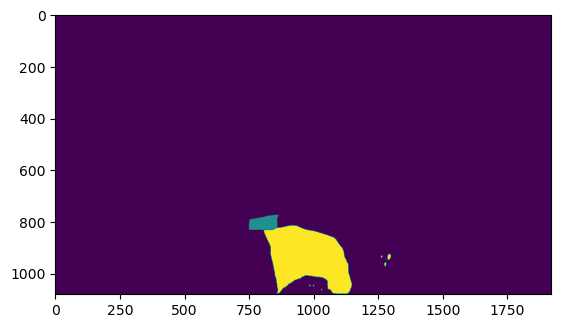

In [28]:
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

image = Image.open("J_GL_4893.0.png")


image_arr = np.asarray(image)

transform = transforms.Compose ([
    # transforms.Resize(size=(161, 161), interpolation=PIL.Image.NEAREST),
    transforms.ToTensor()
])

image_arr = transform(image)

image_arr = image_arr[0, :, :] + image_arr[1, :, :] + np.multiply(image_arr[2, :, :], 2)

np.unique(image_arr)

pil_image = Image.fromarray(np.uint8(image_arr))


plt.imshow(image_arr)


In [2]:
from models import UNET

ModuleNotFoundError: No module named 'models'

In [1]:
from dataloaders.datamodule import AssemblyDataModule

ModuleNotFoundError: No module named 'dataloaders'